Natalie Rehfeld
A3 Homework 

In [1]:
import math
import statistics
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data=pd.read_csv('drive/MyDrive/4.35Data.csv', sep=',', na_values=".")
data

,Flow,Obs
0,125,2.7
1,125,2.6
2,125,4.6
3,125,3.2
4,125,3.0
5,125,3.8
6,160,4.6
7,160,4.9
8,160,5.0
9,160,4.2


###1 4.35
a)does c2f6 flow rate on etch uniformity?

In [9]:
Flow125=data[data['Flow']==125]['Obs']
Flow125

0    2.7
1    2.6
2    4.6
3    3.2
4    3.0
5    3.8
Name: Obs, dtype: float64

In [10]:
statistics.mean(Flow125)

3.3166666666666664

In [11]:
np.mean(Flow125)

3.316666666666667

In [12]:
statistics.stdev(Flow125)

0.760043858383624

In [13]:
np.std(Flow125, ddof=1)

0.760043858383624

In [14]:
Flow160=data[data['Flow']==160]['Obs']
Flow200=data[data['Flow']==200]['Obs']

In [15]:
stat, p=f_oneway(Flow125, Flow160, Flow200 )
print('stat=%.3f, p=%.3f' %(stat,p))

stat=3.586, p=0.053


We cannot reject H0 because it's greater than 0.05.

b) construct a box plot of the etch uniformity data. use this plot, together with the analysis of variance results. to determine which gas flow rate would be best in terms of etch uniformity

In [17]:
df = data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Flow    18 non-null     int64  
 1   Obs     18 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 416.0 bytes


In [19]:
model = ols('Obs ~ C(Flow)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Flow),3.647778,2.0,3.585627,0.053365
Residual,7.630000,15.0,NaN,NaN


In [20]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    Obs   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     3.586
Date:                Fri, 23 Sep 2022   Prob (F-statistic):             0.0534
Time:                        12:05:28   Log-Likelihood:                -17.816
No. Observations:                  18   AIC:                             41.63
Df Residuals:                      15   BIC:                             44.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.3167      0.291     11.

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


In [21]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F)
C(Flow),3.647778,2.0,1.823889,3.585627,0.053365
Residual,7.630000,15.0,0.508667,NaN,NaN


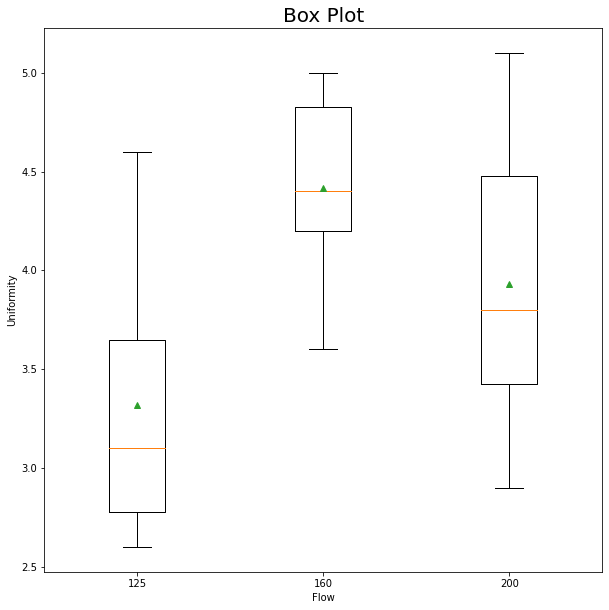

In [24]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot", fontsize= 20)
ax.set

data2=[Flow125, Flow160, Flow200]

ax.boxplot(data2,
           labels= ['125', '160', '200'],
           showmeans= True)

plt.xlabel("Flow")
plt.ylabel("Uniformity")

plt.show()

Flow 160 would be the best because it has the smallest spread of data.

c) plot the residuals versus predicted C2F6 flow. interpet the plot

In [25]:
uni_predict=model.predict()
uni_predict

array([3.31666667, 3.31666667, 3.31666667, 3.31666667, 3.31666667,
       3.31666667, 4.41666667, 4.41666667, 4.41666667, 4.41666667,
       4.41666667, 4.41666667, 3.93333333, 3.93333333, 3.93333333,
       3.93333333, 3.93333333, 3.93333333])

In [26]:
residuals=model.resid
residuals

0    -0.616667
1    -0.716667
2     1.283333
3    -0.116667
4    -0.316667
5     0.483333
6     0.183333
7     0.483333
8     0.583333
9    -0.216667
10   -0.816667
11   -0.216667
12    0.666667
13   -1.033333
14   -0.533333
15   -0.433333
16    0.166667
17    1.166667
dtype: float64

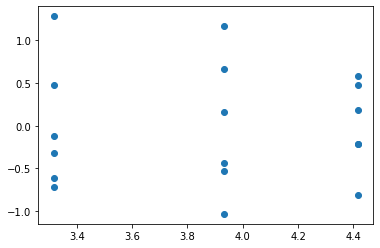

In [28]:
plt.scatter(uni_predict, residuals)

plt.show()

d) does this normality assumption seem resasonable in this problem?

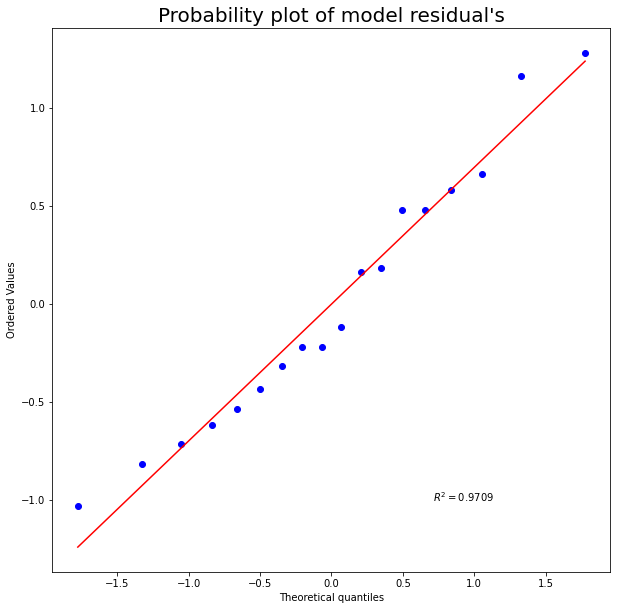

In [29]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

It passes the fat pencil test

##1 4.36


We were not assigned 4.33 so we cannot answer this question

###2 4.53
consider the minitab output below

In [30]:
T = (31.4-30)/0.336
T

4.1666666666666625

a) Using the T dist chart found in the book, we found alpha is 0.0005, making the p-value 0.0005*2 = 0.001

Using alpha as 0.0005, we use the Z table in the appendix to find a value of 1.96

b) this is a two sided test because you can reject it using the lower or upper sided bounds

c) 31.4+1.96 X 1.3/Sqrt(15) & 31.4-1.96 X 1.3/Sqrt(15) for the upper and lower bounds

d) 1.3/Sqrt(15)

e) p-val/2, so 0.001/2 = 0.0005

###3 4.47
The brake horsepower developed by an automobile engine on a dynamometer is thought to be a function of the engine speed in rpm, the road octane number of the fuel, and the engine compression

In [31]:
data2 = data=pd.read_csv('drive/MyDrive/4.47_Data.csv', sep=',', na_values=".")
data2

,BrakeHP,rpm,RoadOct,Compression
0,225,2000,90,100
1,212,1800,94,95
2,229,2400,88,110
3,222,1900,91,96
4,219,1600,86,100
5,278,2500,96,110
6,246,3000,94,98
7,237,3200,90,100
8,233,2800,88,105
9,224,3400,86,97


a) Fit a multiple regression model to these data

In [32]:
model2 = ols('BrakeHP ~ rpm + RoadOct + Compression', data2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                BrakeHP   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     11.12
Date:                Fri, 23 Sep 2022   Prob (F-statistic):            0.00317
Time:                        12:41:18   Log-Likelihood:                -40.708
No. Observations:                  12   AIC:                             89.42
Df Residuals:                       8   BIC:                             91.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -266.0312     92.674     -2.871      

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


b) test for significance of regression. What conclusions can you draw?

0.00317 is our p-value which is below 0.05. That means it is significant

c) based on t-tests do you need all three regressor variables in the model?

The p-val for rpm, RoadOct, and Compression are all below 0.05 which means they are significant.